### Assignment 2
- Deadline: June 11th
- total points: 80

In [1]:
# We are going to start importing the libraries we need all in one cell. 
# It is a good practice to keep all the imports in one cell so that
# we can easily see what libraries we are using in the notebook.

#  importing the pyplot module from the matplotlib library and giving it an alias plt
from matplotlib import pyplot as plt 

# this command ensures that the plot is rendered directly in the notebook
%matplotlib inline
import seaborn as sns

import pandas as pd
import numpy as np

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Part 1

Using the `housing_combined` dataset: 

(1) (5 pts) visualize the relationship between unit housing price (UnitPrice) and the distance to CBD.

(2) (5 pts) show the transaction counts by month from Jan 2012 to Dec 2016

In [3]:
# import the combined dataset, and assign a name df_combine
df_combine = pd.read_excel("housing_combine.xlsx")

In [4]:
# If you do not have the column "UnitPrice", run the following code: 
df_combine["UnitPrice"] = df_combine["TotalPrice"] / df_combine["Size"]

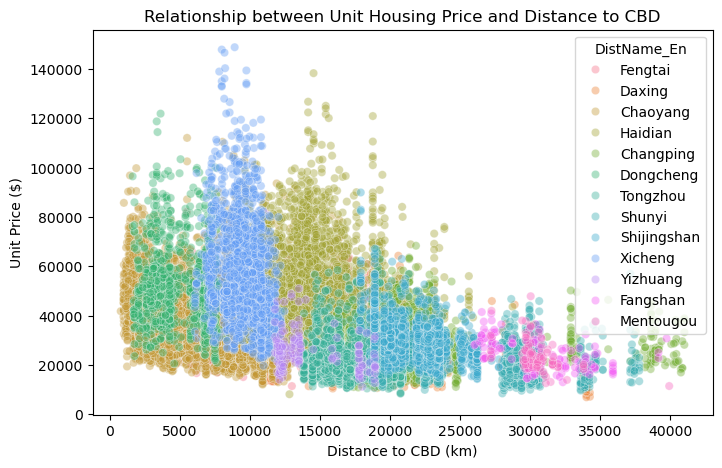

In [7]:
# Plotting the scatter plot for unit housing prices vs distance to CBD
plt.figure(figsize=(8, 5))

sns.scatterplot(data=df_combine, x='Dist2CBD', y='UnitPrice', hue = "DistName_En", alpha = 0.4)

plt.title('Relationship between Unit Housing Price and Distance to CBD')
plt.xlabel('Distance to CBD (km)')
plt.ylabel('Unit Price ($)')
plt.show()

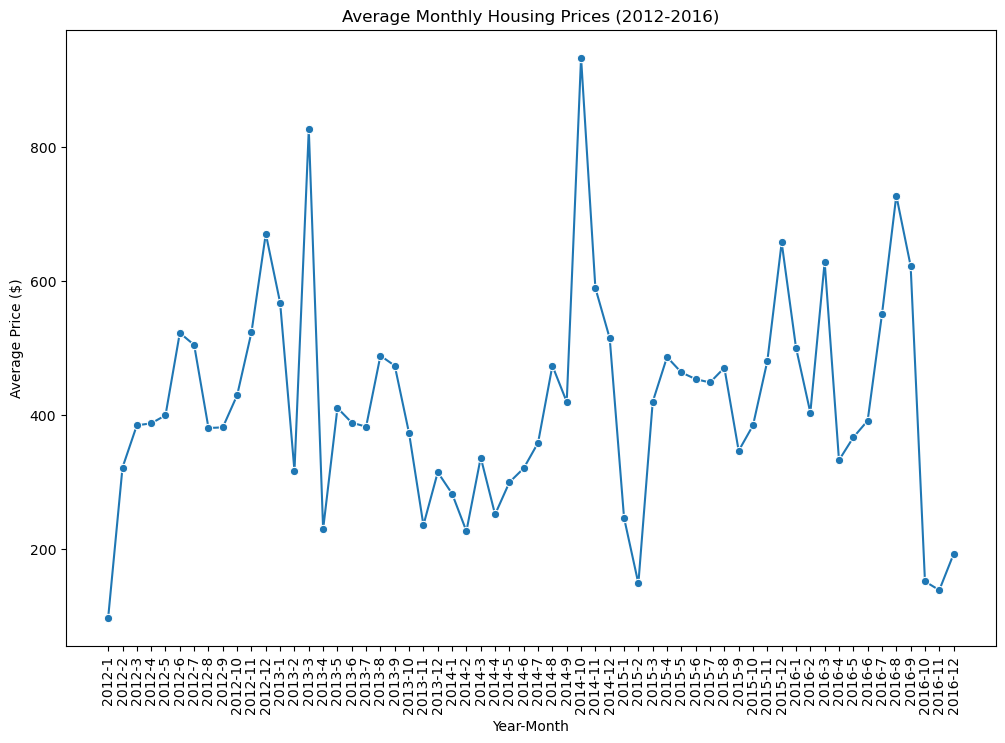

In [5]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].count().reset_index()

# Combine year and month into a single column for plotting
df_avg_price['year_month'] = df_avg_price['TransYear'].astype(str) + '-' + df_avg_price['TransMonth'].astype(str)

# df_avg_price['year_month'] = pd.to_datetime(df_avg_price['TransYear'].astype(str) + 
#                                             '-' + df_avg_price['TransMonth'].astype(str) + 
#                                             '-01')

# Plotting the line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_avg_price, x='year_month', y='UnitPrice', marker='o')
plt.title('Average Monthly Housing Prices (2012-2016)')
plt.xlabel('Year-Month')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()

Text(120.72222222222221, 0.5, 'Year')

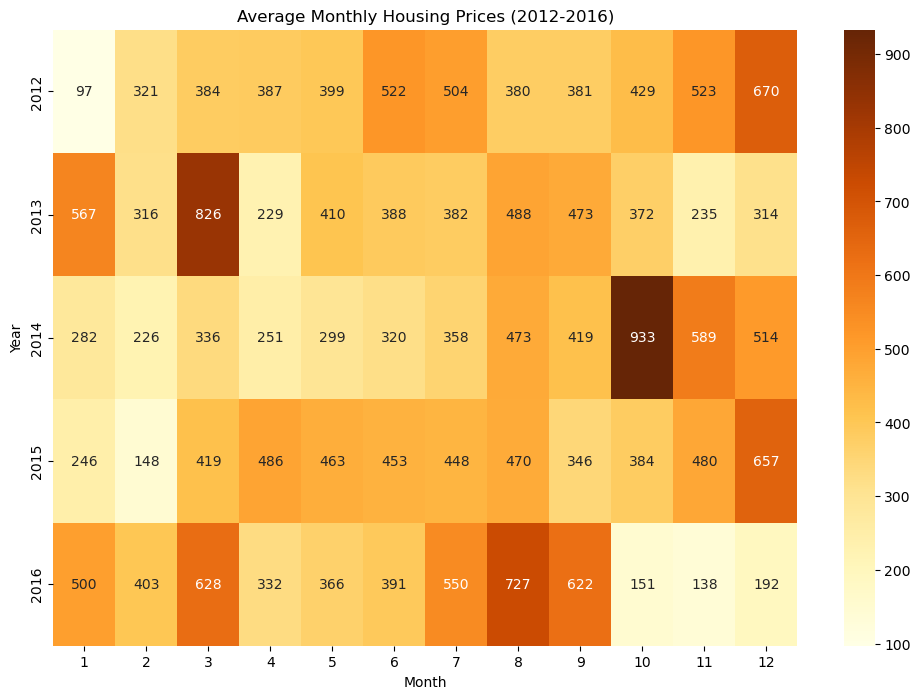

In [6]:
# Group by year and month to get the average price
df_avg_price = df_combine.groupby(['TransYear', 'TransMonth'])['UnitPrice'].count().unstack()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_avg_price, annot=True, fmt=".0f", cmap='YlOrBr')
plt.title('Average Monthly Housing Prices (2012-2016)')
plt.xlabel('Month')
plt.ylabel('Year')

## Part 2

In this assignment, we will be working on the Beijing PM2.5 dataset and investigate whether the air quality Beijing has improved or not in the recent years due to a series of policies implemented for restricting emissions and faciliating the sustainable urban development. The original PM2.5 concentration dataset was collected from Beijing Municipal Ecological and Environmental Monitoring Center (http://www.bjmemc.com.cn/), and was aggregated from hourly level to daily level. 

Now open the data folder. There are five PM2.5 Excel files corresponding to five years, ranging from 2014 to 2018. Randomly open a file and check out the column names. The first column stores the date in the format of "YYYYMMDD", and the remaining columns are the names of 35 air quality monitoring stations that collect the daily PM2.5 concentration ($\mu{}g/m^3$).

Now finish the following tasks based on the requirements:

(1) (10 pts) combine the five PM2.5 datasets and store them in a single dataframe. Make sure the column names for each year are the same before combining the files so that no redundant rows exist in the final dataframe. Note that after you generating a combined dataframe, run the following code to converts each columns to integer or float types.
```python
df_combine = df_combine.apply(pd.to_numeric)
```

(2) (10 pts) 
   - Create in the combined DataFrame a new column called "PM25_Average" that saves the daily average PM2.5 concentration in the 35 monitoring stations. You can use the `pd.mean(axis = 1)` to add up the each columns.   
   - If a day with good air quality can be defined as the daily average PM2.5 concentration samller than 75 ($\mu{}g/m^3$), then what percentage of days has a good air quality? 
 
(3) (10 pts) Create a new column called "Year" to store the corresponding years (YYYY only, instead of YYYYMMDD) (Notice: in case you want to convert the date to string type: `df_combine["date"].astype(str)`). **Optional**: Place the new column between the column "date" and "Dongsi".    

(4) (10 pts) If a day with daily average PM2.5 concentration greater than 200 ($\mu{}g/m^3$) can be regarded as a seriously polluted day, then for the monitoring station "Olympic Center", 
- (1) how many days are counted as the seriously polluted day **for each year**?
- (2) how many days are counted as good air quality day **for each year** (average PM2.5 concentration samller than 75)?
- (3) Do you observe any improvement in air quality? You can use the function `.groupby().count()` to count the number of days. 

(5) (10 pts) Generate a line plot that displays the daily PM2.5 change in 2014 for the monitoring station "Olympic Center" which locates in the inner city area, and the station called "The Great Wall" in the mountainous area. What do you find? Please plot the two lines in the same Axes for easier comparison, and also make sure the x-axis is "date", and the y-axis are the PM2.5 values.

(6) (10 pts) Generate a line plot that displays the trend of PM2.5 from 2014 to 2018 (using annual average data) for the stations "Olympic Center" and "The Great Wall". Please plot the two lines in the same Axes for easier comparison. 


(7) (10 pts) Now let us create a spatial dataset of Beijing air quality by adding the longitude and latitude columns to each station. The combined dataset now has station names as columns and a sequence as index. To join the coordinates to the dataset, we need to make the station names in the rows and date in the column names. The easiest solution is simply using `df = df.T` that transposes the index and columns in a DataFrame. But before that, make sure to import the `numpy` package (`import numpy as np`) to enable its built-in function `.T`. Also, set "date" column as index (Hint: `df_combineT = df_combine.set_index('date').T`）. Next, find the Excel called "lnglat.xlsx" which stores the longitude and latitude of the stations. Merge it to the transposed dataframe.   

In [48]:
import pandas as pd

In [54]:
# (1)
df_combine = pd.DataFrame()

for year in list(range(2014, 2019)):
    df_temp = pd.read_excel("PM25_"+str(year)+".xlsx")
    if year == 2014:
        col_2014 = list(df_temp.columns)
        df_combine = df_temp
    else: 
        df_temp.columns = col_2014
    
        df_combine = pd.concat([df_combine, df_temp])

df_combine.reset_index(drop = True, inplace = True)  
df_combine = df_combine.apply(pd.to_numeric)
df_combine  

,date,Dongsi,Tiantan,Guanyuan,Wanshouxigong,Olympic Center,Nongzhanguan,Wanliu,North New District,Botanical Garden,...,Miyun Reservior,Donggaocun,Yongle,Yufa,Liuli River,Qian Gate,Yongding Gate,Xizhi Gate,South Ring,East Ring
0,20140101,56.208333,48.750000,48.791667,71.250000,48.458333,50.666667,69.166667,34.208333,20.782609,...,25.666667,34.541667,111.666667,111.791667,144.291667,77.416667,72.666667,47.541667,86.208333,48.625000
1,20140102,129.375000,108.625000,113.458333,123.875000,151.708333,142.250000,152.041667,110.625000,83.863636,...,66.000000,75.095238,166.916667,153.666667,188.208333,135.208333,129.458333,117.375000,142.291667,147.250000
2,20140103,50.583333,44.833333,43.666667,57.166667,50.875000,53.875000,55.208333,51.083333,31.375000,...,25.842105,30.208333,85.958333,77.333333,96.416667,63.500000,53.291667,48.500000,60.083333,49.666667
3,20140104,130.458333,125.541667,115.583333,132.041667,121.500000,136.833333,127.041667,124.458333,112.083333,...,82.916667,55.333333,140.875000,138.083333,173.166667,140.750000,133.500000,125.875000,140.875000,141.208333
4,20140105,90.833333,78.458333,74.291667,80.250000,90.125000,98.000000,98.083333,123.708333,61.652174,...,85.823529,58.541667,145.375000,160.708333,181.958333,93.125000,85.416667,81.125000,89.250000,103.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,20181227,8.833333,7.111111,9.750000,11.000000,7.500000,9.791667,5.304348,5.272727,NaN,...,4.333333,5.500000,13.583333,14.041667,14.458333,7.000000,7.750000,9.041667,6.863636,8.500000
1794,20181228,8.541667,6.791667,8.173913,9.833333,9.333333,9.583333,7.550000,5.173913,NaN,...,5.833333,6.739130,15.000000,17.416667,22.956522,8.791667,9.458333,10.875000,10.125000,8.458333
1795,20181229,8.333333,8.521739,7.958333,9.958333,9.083333,10.541667,8.708333,8.043478,NaN,...,9.041667,9.954545,29.166667,63.625000,40.304348,10.875000,11.041667,11.125000,13.416667,10.000000
1796,20181230,12.625000,11.916667,12.625000,14.125000,14.125000,14.708333,15.916667,19.173913,NaN,...,8.375000,11.478261,30.583333,26.307692,28.083333,14.916667,15.869565,15.458333,15.826087,14.375000


In [55]:
# (2) 1
df_combine["PM25_Average"] = df_combine.loc[:,"Dongsi":"East Ring"].mean(axis = 1)
df_combine

,date,Dongsi,Tiantan,Guanyuan,Wanshouxigong,Olympic Center,Nongzhanguan,Wanliu,North New District,Botanical Garden,...,Donggaocun,Yongle,Yufa,Liuli River,Qian Gate,Yongding Gate,Xizhi Gate,South Ring,East Ring,PM25_Average
0,20140101,56.208333,48.750000,48.791667,71.250000,48.458333,50.666667,69.166667,34.208333,20.782609,...,34.541667,111.666667,111.791667,144.291667,77.416667,72.666667,47.541667,86.208333,48.625000,64.268223
1,20140102,129.375000,108.625000,113.458333,123.875000,151.708333,142.250000,152.041667,110.625000,83.863636,...,75.095238,166.916667,153.666667,188.208333,135.208333,129.458333,117.375000,142.291667,147.250000,121.619368
2,20140103,50.583333,44.833333,43.666667,57.166667,50.875000,53.875000,55.208333,51.083333,31.375000,...,30.208333,85.958333,77.333333,96.416667,63.500000,53.291667,48.500000,60.083333,49.666667,53.382601
3,20140104,130.458333,125.541667,115.583333,132.041667,121.500000,136.833333,127.041667,124.458333,112.083333,...,55.333333,140.875000,138.083333,173.166667,140.750000,133.500000,125.875000,140.875000,141.208333,125.363118
4,20140105,90.833333,78.458333,74.291667,80.250000,90.125000,98.000000,98.083333,123.708333,61.652174,...,58.541667,145.375000,160.708333,181.958333,93.125000,85.416667,81.125000,89.250000,103.875000,96.165952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,20181227,8.833333,7.111111,9.750000,11.000000,7.500000,9.791667,5.304348,5.272727,NaN,...,5.500000,13.583333,14.041667,14.458333,7.000000,7.750000,9.041667,6.863636,8.500000,7.676629
1794,20181228,8.541667,6.791667,8.173913,9.833333,9.333333,9.583333,7.550000,5.173913,NaN,...,6.739130,15.000000,17.416667,22.956522,8.791667,9.458333,10.875000,10.125000,8.458333,9.678112
1795,20181229,8.333333,8.521739,7.958333,9.958333,9.083333,10.541667,8.708333,8.043478,NaN,...,9.954545,29.166667,63.625000,40.304348,10.875000,11.041667,11.125000,13.416667,10.000000,14.662026
1796,20181230,12.625000,11.916667,12.625000,14.125000,14.125000,14.708333,15.916667,19.173913,NaN,...,11.478261,30.583333,26.307692,28.083333,14.916667,15.869565,15.458333,15.826087,14.375000,16.903787


In [56]:
# (2) 2 
len(df_combine[df_combine["PM25_Average"] <= 75 ])/len(df_combine)

0.6568409343715239

In [57]:
# (3) 
df_combine["Year"] = df_combine["date"].astype(str).str[:-4]

col = list(df_combine.columns)
col.insert(1, col.pop(col.index("Year")))
df_combine= df_combine.loc[:, col]
df_combine   

,date,Year,Dongsi,Tiantan,Guanyuan,Wanshouxigong,Olympic Center,Nongzhanguan,Wanliu,North New District,...,Donggaocun,Yongle,Yufa,Liuli River,Qian Gate,Yongding Gate,Xizhi Gate,South Ring,East Ring,PM25_Average
0,20140101,2014,56.208333,48.750000,48.791667,71.250000,48.458333,50.666667,69.166667,34.208333,...,34.541667,111.666667,111.791667,144.291667,77.416667,72.666667,47.541667,86.208333,48.625000,64.268223
1,20140102,2014,129.375000,108.625000,113.458333,123.875000,151.708333,142.250000,152.041667,110.625000,...,75.095238,166.916667,153.666667,188.208333,135.208333,129.458333,117.375000,142.291667,147.250000,121.619368
2,20140103,2014,50.583333,44.833333,43.666667,57.166667,50.875000,53.875000,55.208333,51.083333,...,30.208333,85.958333,77.333333,96.416667,63.500000,53.291667,48.500000,60.083333,49.666667,53.382601
3,20140104,2014,130.458333,125.541667,115.583333,132.041667,121.500000,136.833333,127.041667,124.458333,...,55.333333,140.875000,138.083333,173.166667,140.750000,133.500000,125.875000,140.875000,141.208333,125.363118
4,20140105,2014,90.833333,78.458333,74.291667,80.250000,90.125000,98.000000,98.083333,123.708333,...,58.541667,145.375000,160.708333,181.958333,93.125000,85.416667,81.125000,89.250000,103.875000,96.165952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,20181227,2018,8.833333,7.111111,9.750000,11.000000,7.500000,9.791667,5.304348,5.272727,...,5.500000,13.583333,14.041667,14.458333,7.000000,7.750000,9.041667,6.863636,8.500000,7.676629
1794,20181228,2018,8.541667,6.791667,8.173913,9.833333,9.333333,9.583333,7.550000,5.173913,...,6.739130,15.000000,17.416667,22.956522,8.791667,9.458333,10.875000,10.125000,8.458333,9.678112
1795,20181229,2018,8.333333,8.521739,7.958333,9.958333,9.083333,10.541667,8.708333,8.043478,...,9.954545,29.166667,63.625000,40.304348,10.875000,11.041667,11.125000,13.416667,10.000000,14.662026
1796,20181230,2018,12.625000,11.916667,12.625000,14.125000,14.125000,14.708333,15.916667,19.173913,...,11.478261,30.583333,26.307692,28.083333,14.916667,15.869565,15.458333,15.826087,14.375000,16.903787


In [31]:
col = df_combine.pop('Year')  # Remove the column and store it in 'col'
df_combine.insert(1, 'Year', col)  # Insert the column at the desired position

In [58]:
# (4)
df_subset = df_combine[df_combine["Olympic Center"] >= 200 ]
print(df_subset.groupby("Year")[["Olympic Center"]].count())


df_subset = df_combine[df_combine["Olympic Center"] <= 75 ]
print(df_subset.groupby("Year")[["Olympic Center"]].count())

      Olympic Center
Year                
2014              31
2015              28
2016              20
2017              10
2018               5
      Olympic Center
Year                
2014             178
2015             216
2016             231
2017             264
2018             287


In [59]:
# (5)
df_subset = df_combine.loc[df_combine["Year"] == "2014", ["Olympic Center","The Great Wall", "date"]]
df_subset["date"] = df_subset["date"].astype(str)
df_subset

,Olympic Center,The Great Wall,date
0,48.458333,28.583333,20140101
1,151.708333,42.782609,20140102
2,50.875000,29.750000,20140103
3,121.500000,86.000000,20140104
4,90.125000,38.625000,20140105
...,...,...,...
352,NaN,81.533333,20141226
353,NaN,106.188235,20141227
354,NaN,39.892308,20141228
355,NaN,29.916667,20141229


KeyError: 'date'

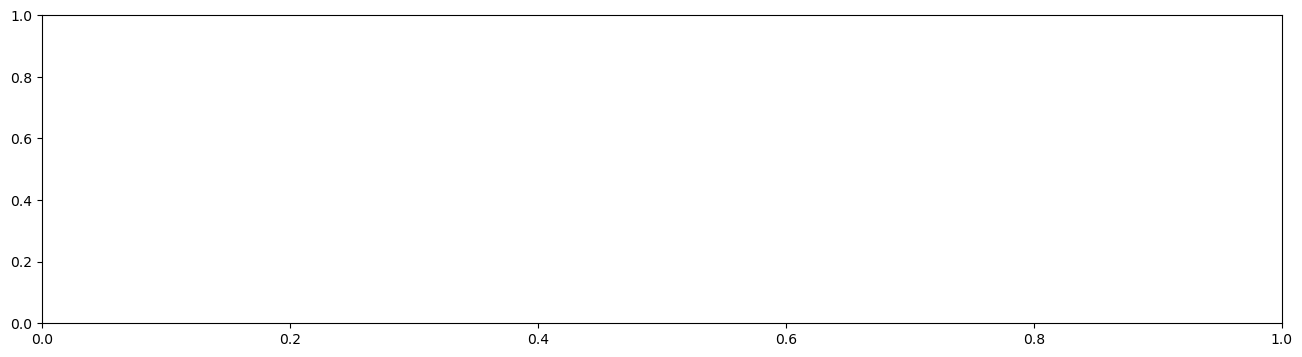

In [52]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig, ax = plt.subplots(figsize=(16, 4))

# Line plot
df_subset.plot(kind = "line", x = 'date', y='Olympic Center', marker='o', markersize=1, linewidth=0.4, ax = ax)
df_subset.plot(kind = "line", x = 'date', y='The Great Wall', marker='s', markersize=1, linewidth=0.4, ax = ax)

In [36]:
# (6)
df_subset = df_combine[["Olympic Center","The Great Wall", "Year"]]
df_subset = df_subset.groupby("Year").mean()


In [37]:
df_subset

,Olympic Center,The Great Wall
Year,,
2014,91.021346,68.986232
2015,81.764638,54.159617
2016,72.755040,51.143530
2017,58.651494,46.313047
2018,52.072853,47.999997


<Axes: xlabel='Year'>

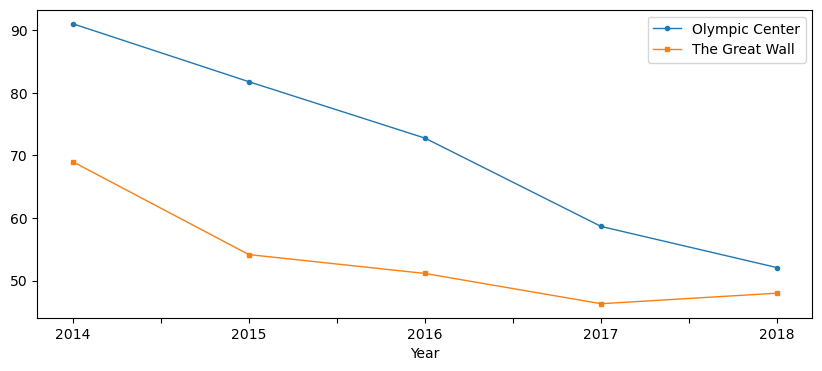

In [38]:
fig, ax = plt.subplots(figsize=(10, 4))

df_subset.plot(kind = "line", y='Olympic Center', marker='o', markersize=3, linewidth=1, ax = ax)
df_subset.plot(kind = "line", y='The Great Wall', marker='s', markersize=3, linewidth=1, ax = ax)

In [39]:
df_combine

,date,Year,Dongsi,Tiantan,Guanyuan,Wanshouxigong,Olympic Center,Nongzhanguan,Wanliu,North New District,...,Donggaocun,Yongle,Yufa,Liuli River,Qian Gate,Yongding Gate,Xizhi Gate,South Ring,East Ring,PM25_Average
0,20140101,2014,56.208333,48.750000,48.791667,71.250000,48.458333,50.666667,69.166667,34.208333,...,34.541667,111.666667,111.791667,144.291667,77.416667,72.666667,47.541667,86.208333,48.625000,64.268223
1,20140102,2014,129.375000,108.625000,113.458333,123.875000,151.708333,142.250000,152.041667,110.625000,...,75.095238,166.916667,153.666667,188.208333,135.208333,129.458333,117.375000,142.291667,147.250000,121.619368
2,20140103,2014,50.583333,44.833333,43.666667,57.166667,50.875000,53.875000,55.208333,51.083333,...,30.208333,85.958333,77.333333,96.416667,63.500000,53.291667,48.500000,60.083333,49.666667,53.382601
3,20140104,2014,130.458333,125.541667,115.583333,132.041667,121.500000,136.833333,127.041667,124.458333,...,55.333333,140.875000,138.083333,173.166667,140.750000,133.500000,125.875000,140.875000,141.208333,125.363118
4,20140105,2014,90.833333,78.458333,74.291667,80.250000,90.125000,98.000000,98.083333,123.708333,...,58.541667,145.375000,160.708333,181.958333,93.125000,85.416667,81.125000,89.250000,103.875000,96.165952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,20181227,2018,8.833333,7.111111,9.750000,11.000000,7.500000,9.791667,5.304348,5.272727,...,5.500000,13.583333,14.041667,14.458333,7.000000,7.750000,9.041667,6.863636,8.500000,7.676629
1794,20181228,2018,8.541667,6.791667,8.173913,9.833333,9.333333,9.583333,7.550000,5.173913,...,6.739130,15.000000,17.416667,22.956522,8.791667,9.458333,10.875000,10.125000,8.458333,9.678112
1795,20181229,2018,8.333333,8.521739,7.958333,9.958333,9.083333,10.541667,8.708333,8.043478,...,9.954545,29.166667,63.625000,40.304348,10.875000,11.041667,11.125000,13.416667,10.000000,14.662026
1796,20181230,2018,12.625000,11.916667,12.625000,14.125000,14.125000,14.708333,15.916667,19.173913,...,11.478261,30.583333,26.307692,28.083333,14.916667,15.869565,15.458333,15.826087,14.375000,16.903787


In [46]:
# (7)
df_combineT = df_combine.set_index('date').T
df_coord = pd.read_excel("lnglat.xlsx")  

df_final = pd.merge(df_combineT, df_coord,left_index=True, right_on="Eng_name")
df_final

,20140101,20140102,20140103,20140104,20140105,20140106,20140107,20140108,20140109,20140110,...,20181225,20181226,20181227,20181228,20181229,20181230,20181231,Eng_name,lon,lat
0,56.208333,129.375,50.583333,130.458333,90.833333,133.791667,103.0,17.5,25.434783,67.625,...,34.826087,18.791667,8.833333,8.541667,8.333333,12.625,39.125,Dongsi,116.41700,39.92900
1,48.75,108.625,44.833333,125.541667,78.458333,133.75,91.541667,13.458333,24.434783,67.791667,...,35.130435,3.181818,7.111111,6.791667,8.521739,11.916667,38.208333,Tiantan,116.40700,39.88600
2,48.791667,113.458333,43.666667,115.583333,74.291667,121.5,95.125,13.791667,30.347826,69.083333,...,27.772727,8.125,9.75,8.173913,7.958333,12.625,41.041667,Guanyuan,116.33900,39.92900
3,71.25,123.875,57.166667,132.041667,80.25,136.708333,94.0,21.583333,42.565217,111.375,...,32.583333,12.454545,11.0,9.833333,9.958333,14.125,42.875,Wanshouxigong,116.35200,39.87800
4,48.458333,151.708333,50.875,121.5,90.125,125.208333,105.041667,15.208333,36.73913,60.708333,...,31.166667,7.5,7.5,9.333333,9.083333,14.125,38.708333,Olympic Center,116.39700,39.98200
5,50.666667,142.25,53.875,136.833333,98.0,136.291667,108.416667,13.666667,27.695652,72.083333,...,40.541667,9.625,9.791667,9.583333,10.541667,14.708333,41.375,Nongzhanguan,116.46100,39.93700
6,69.166667,152.041667,55.208333,127.041667,98.083333,136.375,111.25,15.041667,29.043478,84.208333,...,20.5,8.708333,5.304348,7.55,8.708333,15.916667,32.125,Wanliu,116.28700,39.98700
7,34.208333,110.625,51.083333,124.458333,123.708333,158.25,104.708333,15.666667,23.26087,91.625,...,23.333333,10.583333,5.272727,5.173913,8.043478,19.173913,33.454545,North New District,116.17400,40.09000
8,20.782609,83.863636,31.375,112.083333,61.652174,128.333333,81.869565,12.708333,21.434783,62.458333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Botanical Garden,116.20700,40.00200
9,88.833333,135.791667,64.083333,142.833333,89.708333,150.333333,106.625,16.791667,38.130435,101.125,...,33.041667,11.666667,8.5,6.375,8.958333,16.875,37.0,Fengtai Garden,116.27900,39.86300
